In [1]:
#Ice cream sales data of last 30 days and we want to predict the sales on the basis of temperature.
# Create a Simple Linear Regression to predict the sales and also visualize the same using scatter plot chart.
# Evaluate your model using R2 score.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
X=pd.read_csv("Sales.csv")
X


,Days,Temprature (In degree celcius),Number of Ice creams sold
0,Day1,15,16
1,Day2,16,14
2,Day3,15,17
3,Day4,18,14
4,Day5,16,13
5,Day6,20,32
6,Day7,21,27
7,Day8,20,21
8,Day9,23,27
9,Day10,24,26


In [85]:
X_train=X["Temprature (In degree celcius)"].values
X_train=X_train.reshape(30,-1)
X_train.shape

(30, 1)

In [86]:
y_train=X["Number of Ice creams sold"].values
y_train=y_train.reshape(30,-1)
y_train.shape


(30, 1)

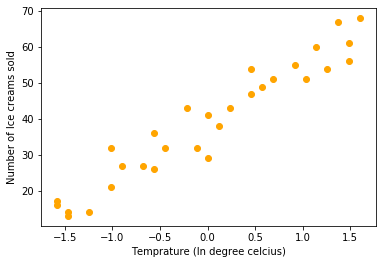

In [108]:
plt.scatter(X_train, y_train, color='orange')
plt.xlabel("Temprature (In degree celcius)")
plt.ylabel("Number of Ice creams sold")
plt.show()

In [88]:
mu=X_train.mean()
sigma=X_train.std()

In [89]:
X_train = (X_train - mu)/ sigma

In [90]:
X_train[0].shape

(1,)

In [91]:
y_train[0].shape

(1,)

# Linear Regression

In [92]:
def hypothesis(x, theta): #we can too pass diff way theta 1,2 but if n then ?
    #so we take it as a vector 
    """
    theta : np array (2,1)
    x : scaler 
    
    return : prediction given input(x)
    """
    return theta[0] + theta[1]*x  #y_pred=theta[0] + theta[1]*x we can do this var for return too


In [93]:
def error(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : total error for any hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2
    
    return total_err/m


In [94]:
def gradient(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : np array gradient (2,1)
    """
    m  = X.shape[0]
    
    grad = np.zeros(2) # or we can np.array([0,0]) (2,)
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi)*X[i]
        
    return grad/m


In [95]:
#this is our main function that is calling
#that calls gradient and error
def gradient_descent(X, Y, lr =0.1, max_itr = 100):
    """
    parameters: 
        X - (3750, 1) 
        Y - (3750, 1) 
        lr - learning rate
        max_itr  - maximum iteration
    
    ----------------------------------
    
    return : 
        theta vector (2,1)
        error_list  
    """
    
    
    theta = np.zeros(2,) #we can intialize it with zeros or 
    #any random value np.random.randn(2,)
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, Y, theta)
        error_list.append(err[0]) # append this error to error list so we can plot
        
        grad = gradient(X, Y, theta)
        
        # Updation Rule
        theta[0]  = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return (theta, error_list)

In [96]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)

In [97]:
opt_theta

array([39.1322939 , 15.70748946])

In [98]:
error_list[-5:]

[20.243893569599077,
 20.243892886001866,
 20.243892332288123,
 20.24389188377999,
 20.24389152048841]

Text(0, 0.5, 'error')

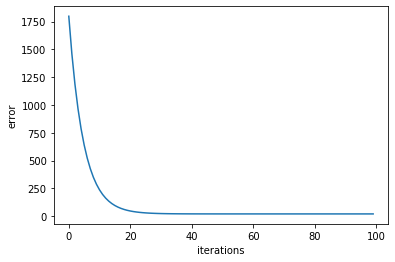

In [100]:
plt.plot(error_list)
plt.xlabel("iterations")
plt.ylabel("error")

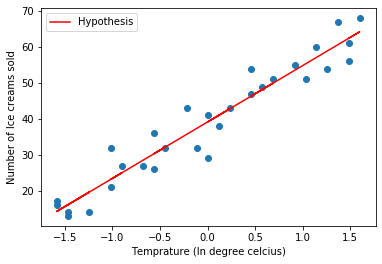

In [109]:
plt.scatter(X_train, y_train)
plt.plot(X_train,hypothesis(X_train, opt_theta), color='red', label="Hypothesis")
plt.xlabel("Temprature (In degree celcius)")
plt.ylabel("Number of Ice creams sold")
plt.legend()
plt.show()

In [103]:
y_train.mean()


39.13333333333333

# R2 Score

In [104]:
y_pred_on_train = hypothesis(X_train, opt_theta)


In [106]:
def r2_score(Y, Y_):
    """
    calculate r2 score 
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [107]:
r2_score(y_train, y_pred_on_train)


0.9241751339931081

In [121]:
X.(["Temprature (In degree celcius)","Number of Ice creams sold"])


SyntaxError: invalid syntax (<ipython-input-121-3c73d2711819>, line 1)

In [128]:

data1=X[["Temprature (In degree celcius)","Number of Ice creams sold"]].values

In [129]:
data1

array([[15, 16],
       [16, 14],
       [15, 17],
       [18, 14],
       [16, 13],
       [20, 32],
       [21, 27],
       [20, 21],
       [23, 27],
       [24, 26],
       [25, 32],
       [24, 36],
       [27, 43],
       [28, 32],
       [29, 41],
       [30, 38],
       [31, 43],
       [29, 29],
       [33, 54],
       [34, 49],
       [35, 51],
       [33, 47],
       [37, 55],
       [38, 51],
       [39, 60],
       [40, 54],
       [41, 67],
       [42, 56],
       [43, 68],
       [42, 61]], dtype=int64)

In [135]:
mu=X.mean()
sigma=X.std()
print(mu)
print(sigma)

Temprature (In degree celcius)    28.933333
Number of Ice creams sold         39.133333
dtype: float64
Temprature (In degree celcius)     8.955574
Number of Ice creams sold         16.618920
dtype: float64


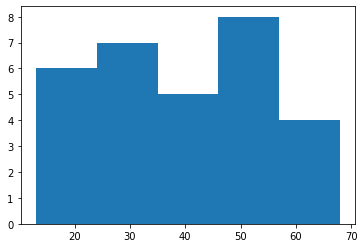

In [147]:
plt.hist(y_train,bins=5) 
plt.show()